In [1]:
import numpy as np
import editdistance

In [76]:
EXP = 100000 #number of experiments
k = 2 #size of the alphabet
length = 10
N = 5 #number of reads
ed = 3
p = 0.1 # probability of error
alphabet = ['0','1','2','3']

In [3]:
def noisyread(s,p):
    noisestring = ""
    for i in s:
        rand = random.randint(1,1000000)
        if rand<(1-p)*1000000:
            #no error
            noisestring += i
        elif rand < ((1-p) + p/3)*1000000:
            #substituition
            noisestring += str((random.randint(1,k-1)+int(i))%k)
        elif rand < ((1-p) + p/3 + p/3)*1000000:
            #insertion
            noisestring += str(random.randint(0,k-1))
            noisestring += i 
            #noisestring += str(random.randint(0,k-1))
        #deletion
    return noisestring

In [ ]:
def noisyread(s,p):
    noisestring = ""
    for i in s:
        rand = random.randint(1,1000000)
        if rand<(1-p)*1000000:
            #no error
            noisestring += i
        elif rand < ((1-p) + p/3)*1000000:
            #substituition
            noisestring += str((random.randint(1,k-1)+int(i))%k)
        elif rand < ((1-p) + p/3 + p/3)*1000000:
            #insertion
            noisestring += str(random.randint(0,k-1))
            noisestring += i 
            #noisestring += str(random.randint(0,k-1))
        #deletion
    return noisestring

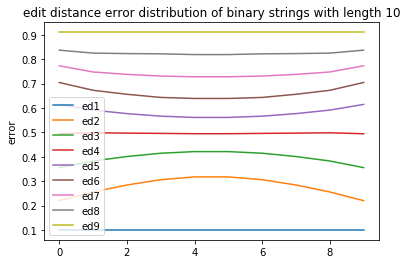

In [32]:
import editdistance
import random
import itertools
import multiprocessing as mp
import matplotlib.pyplot as plt

k = 2 #size of the alphabet
length = 10
alphabet = ['0','1','2','3']

outputs = []
for i in list(itertools.product(alphabet[:k], repeat=length)):
    outputs.append("".join(m for m in i))
random.shuffle(outputs)
filename = 'edit_scaled'


for ed in range(1, 10):
    pos = [0] * length
    count = 0
    for s in outputs:
        neighbors = []
        for o in outputs:
            if editdistance.eval(o, s) == ed: # convert this to <= and it will give the less error
                neighbors.append(o)
        for n in neighbors:
            for letter in range(len(s)):
                if n[letter] != s[letter] :
                    pos[letter] += 1
        count += len(neighbors)    
    plt.plot([p / count for p in pos], label = 'ed' + str(ed))                

plt.ylabel('error')
plt.legend()
plt.title('edit distance error distribution of binary strings with length 10')
plt.savefig(filename)                

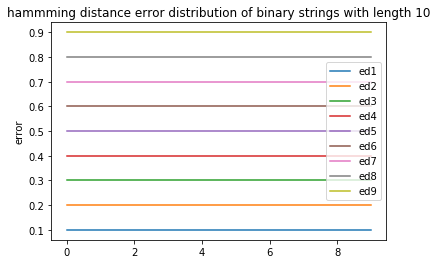

In [31]:
import editdistance
import random
import itertools
import multiprocessing as mp
import matplotlib.pyplot as plt

k = 2 #size of the alphabet
length = 10
alphabet = ['0','1','2','3']

outputs = []
for i in list(itertools.product(alphabet[:k], repeat=length)):
    outputs.append("".join(m for m in i))
random.shuffle(outputs)
filename = 'hamming_scaled'


for ed in range(1, 10):
    pos = [0] * length
    count = 0
    for s in outputs:
        neighbors = []
        for o in outputs:
            if distance.hamming(o, s) == ed:
                neighbors.append(o)
        for n in neighbors:
            for letter in range(len(s)):
                if n[letter] != s[letter] :
                    pos[letter] += 1
        count += len(neighbors)    
    plt.plot([p / count for p in pos], label = 'ed' + str(ed))                

plt.ylabel('error')
plt.legend()
plt.title('hammming distance error distribution of binary strings with length 10')
plt.savefig(filename)                

In [1]:
! pip install Distance

  Using cached Distance-0.1.3.tar.gz (180 kB)
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16265 sha256=0cad51cbc615da0bd6ebb037d4088d53e947faea6d9d7d6154daa016c6ab8b61
  Stored in directory: c:\users\y.tabatabaee\appdata\local\pip\cache\wheels\b2\10\1b\96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built Distance


You should consider upgrading via the 'c:\users\y.tabatabaee\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [6]:
import distance

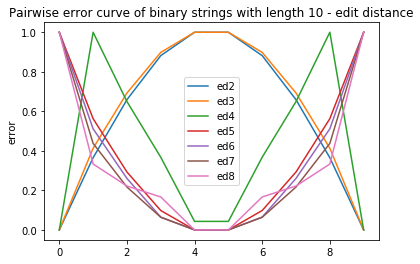

In [16]:
import editdistance
import random
import itertools
import multiprocessing as mp
import matplotlib.pyplot as plt

k = 2 #size of the alphabet
length = 10
alphabet = ['0','1','2','3']

outputs = []
for i in list(itertools.product(alphabet[:k], repeat=length)):
    outputs.append("".join(m for m in i))
random.shuffle(outputs)
filename = 'edit'

for ed in range(2, 9):
    pos = [0]*length
    for s in outputs:
        neighbors = []
        for o in outputs:
            if distance.levenshtein(o, s) == ed:
                neighbors.append(o)
        for n in neighbors:
            for letter in range(len(s)):
                if n[letter] != s[letter] :
                    pos[letter] += 1
    
    maxp = max(pos)
    minp = min(pos)
    plt.plot([(p - minp) / (maxp - minp) for p in pos], label = 'ed' + str(ed))      

plt.ylabel('error')
plt.legend()
plt.title('Pairwise error curve of binary strings with length 10 - edit distance')
plt.savefig(filename)                

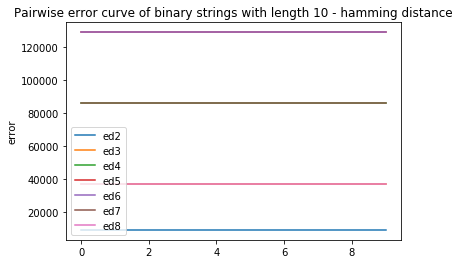

In [15]:
import editdistance
import random
import itertools
import multiprocessing as mp
import matplotlib.pyplot as plt

k = 2 #size of the alphabet
length = 10
alphabet = ['0','1','2','3']

outputs = []
for i in list(itertools.product(alphabet[:k], repeat=length)):
    outputs.append("".join(m for m in i))
random.shuffle(outputs)
filename = 'hamming'

for ed in range(2, 9):
    pos = [0]*length
    for s in outputs:
        neighbors = []
        for o in outputs:
            if distance.hamming(o, s) == ed:
                neighbors.append(o)
        for n in neighbors:
            for letter in range(len(s)):
                if n[letter] != s[letter] :
                    pos[letter] += 1
    
    plt.plot(pos, label = 'ed' + str(ed))      

plt.ylabel('error')
plt.legend()
plt.title('Pairwise error curve of binary strings with length 10 - hamming distance')
plt.savefig(filename)                